# Exercise 3: MFKZIZ004


# The Lotka-Volterra model
 This assignment helped me understand the interactions between the prey and predator bu\y looking at their varying oscilations. 

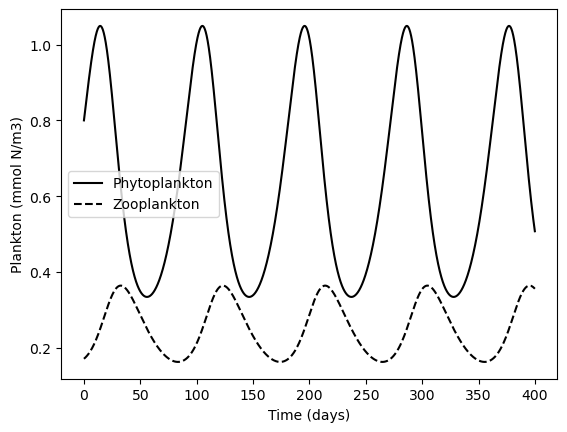

In [3]:

# This code has been taken from LV,pz notebook. 
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def LV_pz(x,t,p):
    X1,X2 = x
    p1,p2,p3,p4 = p
    dX1dt = X1 * (p1 - p2*X2)
    dX2dt = X2 * (p3*p2*X1 - p4)
    return np.array([dX1dt,dX2dt])
## Parameters and initial conditions
# The parameters
p = np.array([0.1,0.4,0.2,0.05])
X1_0 = 0.8
X2_0 = 0.171
x0 = np.array([X1_0,X2_0])
## Time axis
# time units are days
Tstart = 0.
Tend = 400.
step = 0.1
t = np.arange(Tstart,Tend,step)
## Integration using the scipy ODE solver
# note that the extra argument containing the parameter "args" must be a tuple
y = odeint(LV_pz, x0, t, args=(p,))
## Plot Fig. 9.3a
plt.plot(t,y[:,0],'k-',label='Phytoplankton')
plt.plot(t,y[:,1],'k--',label='Zooplankton')
plt.xlabel('Time (days)')
plt.ylabel('Plankton (mmol N/m3)')
plt.legend()
plt.show()


#### (1) Write the code to plot Fig. 9.3b, the trajectory in the phase space
- From using the above code, i had to do panel b below: 

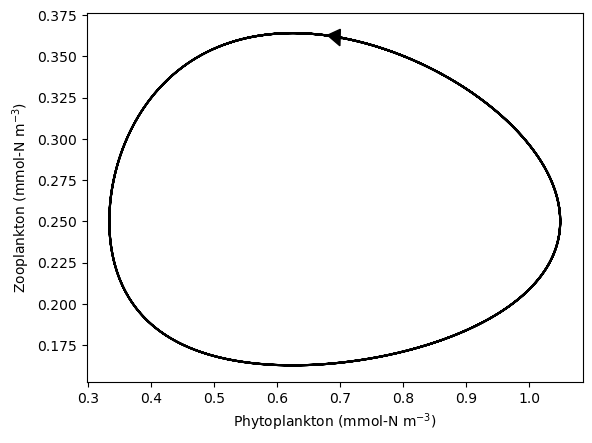

In [91]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Lotka-Volterra model
def LV_pz(x, t, p):
    X1, X2 = x
    p1, p2, p3, p4 = p
    dX1dt = X1 * (p1 - p2 * X2)
    dX2dt = X2 * (p3 * p2 * X1 - p4)
    return [dX1dt, dX2dt]

# Parameters and initial conditions
p = np.array([0.1, 0.4, 0.2, 0.05])
X1_0 = 0.8
X2_0 = 0.171
x0 = [X1_0, X2_0]

# Time vector
t = np.arange(0, 400, 0.1)

# Solve the ODE
sol = odeint(LV_pz, x0, t, args=(p,))

# Extract solutions
X1 = sol[:, 0]  # Phytoplankton
X2 = sol[:, 1]  # Zooplankton

# Plot Fig. 9.3b: Phase plot
plt.figure()
plt.plot(X1, X2, 'k')  # main phase trajectory
plt.xlabel('Phytoplankton (mmol-N m$^{-3}$)')
plt.ylabel('Zooplankton (mmol-N m$^{-3}$)')

# Add an arrow to indicate direction
n = 300  # pick a point along the curve
plt.arrow(X1[n], X2[n], X1[n+1]-X1[n], X2[n+1]-X2[n],
          shape='full', head_width=0.01, head_length=0.02, fc='k', ec='k')

plt.show()


#### (2) : Set the parameter p3=1 and compare how different the trajectory is in the phase space



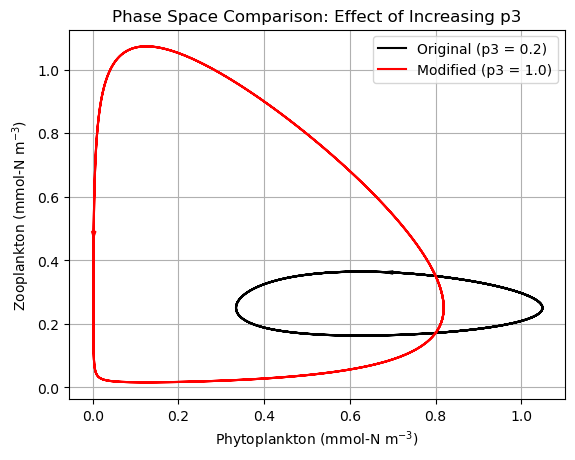

In [27]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Ai has assisted me in this section because I asked it to modify the code I had for the phase plot. I wanted it to create a plot with p3 =1 and show both what I
# had initially and what I would hacve as p3=1. This was to make things easy for me to look and the differences and be able to describe them more
# effectively. 

# Lotka-Volterra model
def LV_pz(x, t, p):
    X1, X2 = x
    p1, p2, p3, p4 = p
    dX1dt = X1 * (p1 - p2 * X2)
    dX2dt = X2 * (p3 * p2 * X1 - p4)
    return [dX1dt, dX2dt]

# Initial conditions and time vector
x0 = [0.8, 0.171]
t = np.arange(0, 400, 0.1)

# Original parameters
p_original = [0.1, 0.4, 0.2, 0.05]
sol_original = odeint(LV_pz, x0, t, args=(p_original,))
X1_orig, X2_orig = sol_original[:, 0], sol_original[:, 1]

# Modified parameters (p3 = 1)
p_modified = [0.1, 0.4, 1.0, 0.05]
sol_modified = odeint(LV_pz, x0, t, args=(p_modified,))
X1_mod, X2_mod = sol_modified[:, 0], sol_modified[:, 1]

# Plotting phase plots
plt.figure()
plt.plot(X1_orig, X2_orig, 'k', label='Original (p3 = 0.2)')
plt.plot(X1_mod, X2_mod, 'r', label='Modified (p3 = 1.0)')

# Arrows to indicate direction
n1 = 300
plt.arrow(X1_orig[n1], X2_orig[n1],
          X1_orig[n1+1]-X1_orig[n1], X2_orig[n1+1]-X2_orig[n1],
          shape='full', head_width=0.01, head_length=0.02, fc='k', ec='k')

n2 = 300
plt.arrow(X1_mod[n2], X2_mod[n2],
          X1_mod[n2+1]-X1_mod[n2], X2_mod[n2+1]-X2_mod[n2],
          shape='full', head_width=0.01, head_length=0.02, fc='r', ec='r')

plt.xlabel('Phytoplankton (mmol-N m$^{-3}$)')
plt.ylabel('Zooplankton (mmol-N m$^{-3}$)')
plt.legend()
plt.title('Phase Space Comparison: Effect of Increasing p3')
plt.grid()
plt.show()


#### Answer: 

- The trajectory ( the circle) is much more bigger, this shows that the zooplankton growth has been enhanced based on the phytoplankton consumption. We see that there are bigger oscillations which lead to some instability in both the phytoplankton and zooplankton community. 

#### (3) Write the code to compute the solution of the L-V model using the initial conditions given in the caption of Fig. 9.4


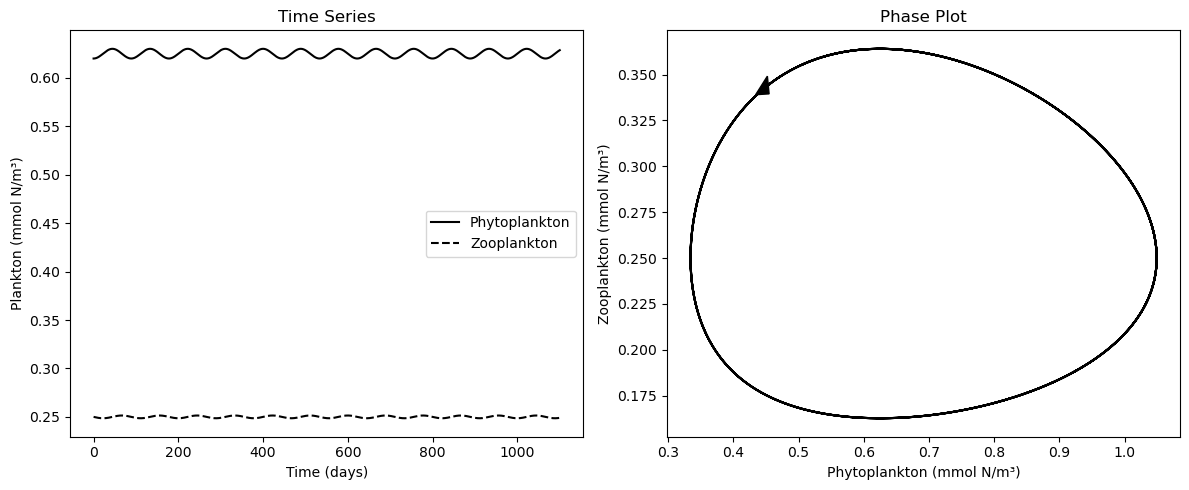

In [170]:
# The Lotka-Volterra model using odeint
# I havem copied the code from the notebook and modified it by using the new parameters that are given in the question. 
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the model
def LV_pz(x, t, p):
    X1, X2 = x
    p1, p2, p3, p4 = p
    dX1dt = X1 * (p1 - p2 * X2)
    dX2dt = X2 * (p3 * p2 * X1 - p4)
    return np.array([dX1dt, dX2dt])

# Parameters: [growth rate, predation rate, conversion efficiency, predator mortality]
p = np.array([0.1, 0.4, 0.2, 0.05])

X1_0 = 0.62
X2_0 =  0.25
x0 = np.array([X1_0,X2_0])
## Time axis
# time units are days
Tstart = 0.
Tend = 1100.
step = 0.1

t = np.arange(Tstart, Tend, step)

# Solve the system
y = odeint(LV_pz, x0, t, args=(p,))

#  Plot (a): Time Series
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(t, y[:, 0], 'k-', label='Phytoplankton')
plt.plot(t, y[:, 1], 'k--', label='Zooplankton')
plt.xlabel('Time (days)')
plt.ylabel('Plankton (mmol N/m³)')
plt.title('Time Series')
plt.legend()

# Extract solutions
X1 = sol[:, 0]  # Phytoplankton
X2 = sol[:, 1]  # Zooplankton

# Plot 2: Phase Plot
plt.subplot(1, 2, 2)
plt.plot(X1, X2, 'k')
plt.xlabel('Phytoplankton (mmol N/m³)')
plt.ylabel('Zooplankton (mmol N/m³)')
plt.title('Phase Plot')

# Add arrow to indicate direction
n = 400  # arrow position index
plt.arrow(X1[n], X2[n],
          X1[n+1] - X1[n],
          X2[n+1] - X2[n],
          shape='full', head_width=0.01, head_length=0.02, fc='k', ec='k')

plt.tight_layout()
plt.show()

#### (4) Why are they different? Think about a few hypotheses and then see the explanation in the document Glover_etal_2011_ERRATA.pdf:

They may be diffrent because they have made use of different variables and values. The oscillation that was given initially was incorrectly alocated.In the Glover errata pdf it was stated that this was the case that there was an incorrect outward oscillation. Additionally, the L-V model equation are stable and they always produce periodic limit cycles. The equation was dissected further to show the stability of the 